In [1]:
# Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import the required plotly libraries

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
military_spending = pd.read_csv("~/Python_Project/military_expenditure_in_usd.csv")
gdp = pd.read_csv("~/Python_Project/gdp_growth.csv")

In [4]:
# Inspect first few rows of the data 

military_spending.head()
gdp.head()

,Country Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,-3.654626,-6.881302,-5.653502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,13.740205,3.611368,21.020649,8.433290,6.113685,14.434741,1.959123,1.312531,1.112558,2.232272
2,Angola,22.593054,13.817146,2.412870,3.407655,3.918597,5.155441,6.813586,4.804473,3.006981,0.000000
3,Albania,5.900000,7.530000,3.350000,3.710000,2.550000,1.420000,1.110000,1.800000,2.590000,3.460000
4,Andorra,0.078039,-8.594256,-3.817986,-5.347977,-4.802675,-1.760010,-0.063514,NaN,NaN,NaN


In [5]:
# Replace the non-numeric data with NaN (Not a Number) 

military_spending = military_spending.replace("..",np.nan)
military_spending = military_spending.replace("...",np.nan)
military_spending = military_spending.replace(". .",np.nan)
military_spending = military_spending.replace(". . .",np.nan)
military_spending = military_spending.replace("xxx",np.nan)

gdp = gdp.replace("..",np.nan)
gdp = gdp.replace("...",np.nan)
gdp = gdp.replace(". .",np.nan)
gdp = gdp.replace(". . .",np.nan)
gdp = gdp.replace("xxx",np.nan)


In [6]:
# Remove the rows which contains NA

military_spending = military_spending.dropna(axis=0,how='any')
gdp = gdp.dropna(axis=0,how='any')

In [7]:
# Merge the gdp data with military spending for the matching country names

gdp_military_spending = (gdp.merge(military_spending,left_on='Country Name', right_on='Country', how='inner'))

In [8]:
# Delete the duplicate column

del gdp_military_spending['Country Name']

In [9]:
# Set the row index as country name as it is unique identifier

gdp_military_spending = gdp_military_spending.set_index('Country')

In [10]:
# Convert the numerical data into numeric data type from object

gdp_military_spending.loc[:,'2007_x':'2016_y'] = gdp_military_spending.loc[:,'2007_x':'2016_y'].apply(pd.to_numeric)

In [11]:
# Subset the data for gdp grwoth rate 

gdp_data = gdp_military_spending.loc[:,'2007_x':'2016_x']

In [12]:
# Find the average growth rate for all the nation for last decade

gdp_data['avggdpgrowth'] = gdp_data.mean(axis=1)

In [13]:
# Sort the data to find fastest growing countries by gdp growth rate

gdp_data_sorted = gdp_data.sort_values(by='avggdpgrowth',ascending=False)

In [15]:
# Subset data to get top 10 fastest growing countries by gdp growth rate

gdp_data_top10 = gdp_data_sorted.iloc[0:10]

In [16]:
# Create the column for country name using indexes

gdp_data_top10['Country'] = gdp_data_top10.index

#Suppress Unnecessary SettingWithCopyWarning 

pd.options.mode.chained_assignment = None  # default='warn'

C:\Users\DEEPAK\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [19]:
# Get military spending of top 10 nations by merging it with gdp top 10 data 

military_spending_top10gdp = (military_spending.merge(gdp_data_top10,
                                                      left_on='Country',right_on='Country',how='inner'))

In [20]:
# Subset for military spending of top 10 nations having fastest average gdp growth in last decade

military_spending_top10gdp = military_spending_top10gdp.loc[:,'Country':'2016']
#military_spending_top10gdp.head()

In [21]:
# Transpose the data 

military_spending_top10gdp_transposed = military_spending_top10gdp.T

# Set columnnames using first row which contains labels
military_spending_top10gdp_transposed.columns = military_spending_top10gdp_transposed.iloc[0]

# Remove the first row which contains columnnames
military_spending_top10gdp_transposed = military_spending_top10gdp_transposed.iloc[1:]

In [22]:
# Subset the data again using country names

military_spending_top10gdp_transposed.loc[:,'Angola':'Cambodia'] = military_spending_top10gdp_transposed.loc[:,'Angola':'Cambodia'].apply(pd.to_numeric)

In [23]:
# Calculate the military growth rate year on year for all the countries and save them as separate columns

military_spending_top10gdp_transposed['AngolaMilitaryGrowth'] = military_spending_top10gdp_transposed.Angola.pct_change()
military_spending_top10gdp_transposed['EthiopiaMilitaryGrowth'] = military_spending_top10gdp_transposed.Ethiopia.pct_change()
military_spending_top10gdp_transposed['GhanaMilitaryGrowth'] = military_spending_top10gdp_transposed.Ghana.pct_change()
military_spending_top10gdp_transposed['MozambiqueMilitaryGrowth'] = military_spending_top10gdp_transposed.Mozambique.pct_change()
military_spending_top10gdp_transposed['RwandaMilitaryGrowth'] = military_spending_top10gdp_transposed.Rwanda.pct_change()
military_spending_top10gdp_transposed['MongoliaMilitaryGrowth'] = military_spending_top10gdp_transposed.Mongolia.pct_change()
military_spending_top10gdp_transposed['AfghanistanMilitaryGrowth'] = military_spending_top10gdp_transposed.Afghanistan.pct_change()
military_spending_top10gdp_transposed['IndiaMilitaryGrowth'] = military_spending_top10gdp_transposed.India.pct_change()
military_spending_top10gdp_transposed['TanzaniaMilitaryGrowth'] = military_spending_top10gdp_transposed.Tanzania.pct_change()
military_spending_top10gdp_transposed['CambodiaMilitaryGrowth'] = military_spending_top10gdp_transposed.Cambodia.pct_change()


In [24]:
# Subset the data for getting growth rates for all countries for last decade

military_spending_growth = military_spending_top10gdp_transposed.loc[:,'AngolaMilitaryGrowth':'CambodiaMilitaryGrowth']

In [25]:
# Transpose the data to diplay Years as columns and Growth Rate as rows

military_spending_growth_transposed = military_spending_growth.T 

In [26]:
# Subset data on basis of years

military_spending_growth_transposed = military_spending_growth_transposed.loc[:,'2008':'2016']

In [27]:
# Subset the fastest growing gdp nations data for gdp growth rates 2008-2016

gdp_data_top10_growth = gdp_data_top10.loc[:,'2008_x':'2016_x']

In [31]:
# Set the column names as years using the military dataset as both have same time series

gdp_data_top10_growth.columns = military_spending_growth_transposed.columns

In [29]:
# Sort both the gdp and military datasets on Country Names for plotting in similar series

gdp_data_top10_growth_sorted = gdp_data_top10_growth.sort_index()
gdp_data_top10_growth_sorted.columns = military_spending_growth_transposed.columns
military_spending_growth_sorted = military_spending_growth_transposed.sort_index()

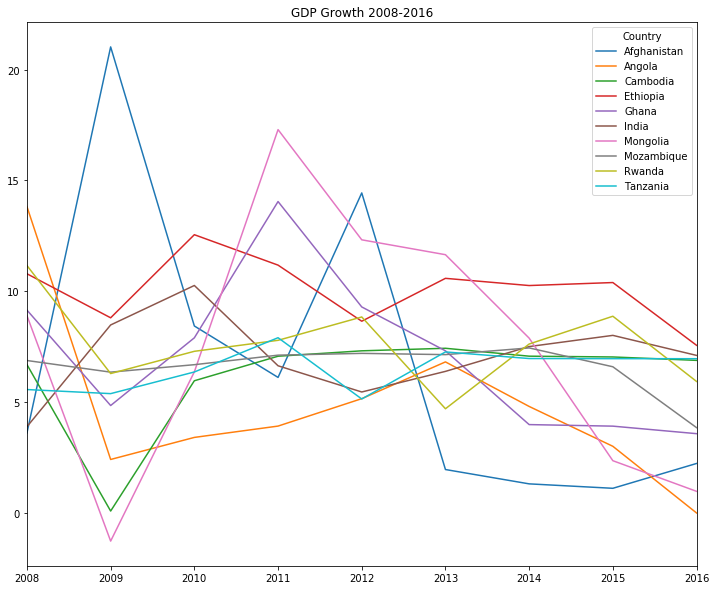

In [186]:
# Plot the gdp growth rate for past decade for top 10 fastest growing economies

gdp_data_top10_growth_sorted.T.plot(legend=True, figsize=(12,10),title='GDP Growth 2008-2016')
plt.show()

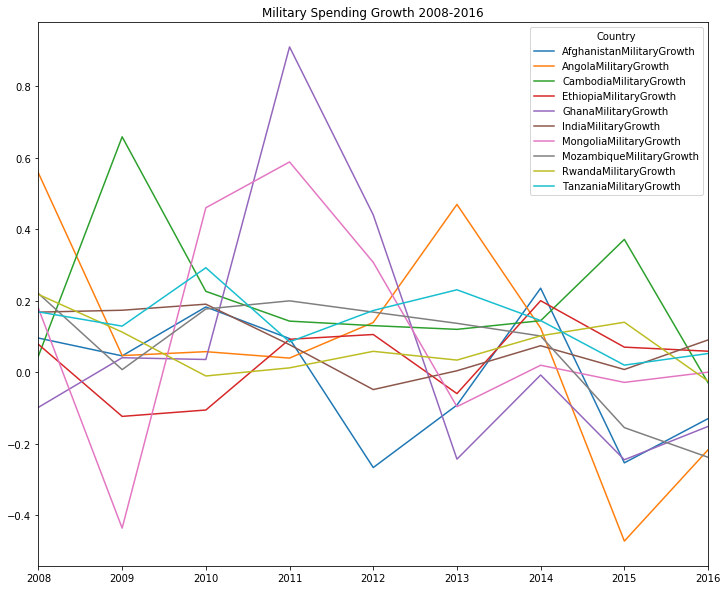

In [188]:
# Plot the military expenditure growth rate for past decade for top 10 fastest growing economies

military_spending_growth_sorted.T.plot(legend=True, figsize=(12,10),title='Military Spending Growth 2008-2016')
plt.show()

In [143]:
military_spending_growth.T.to_csv("military_growth.csv")
gdp_d_top10_growth.to_csv("gdp_growth.csv")